In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin
sns.set_style('whitegrid')
plt.style.use('seaborn')

In [2]:
## Read data
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
## See first 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
## Check for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
## Shape of dataframe (rows,columns)
df.shape

(1000, 8)

[Text(0.5, 1.0, 'Scores distribution per test')]

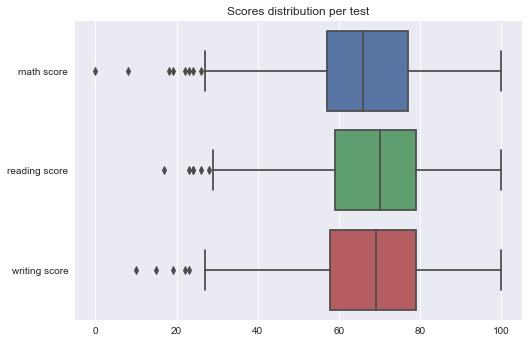

In [6]:
## Select only the columns with scores
columns = ['math score','reading score','writing score']
## Plot the scores 
sns.boxplot(data = df[columns],orient = 'h').set(title = 'Scores distribution per test')

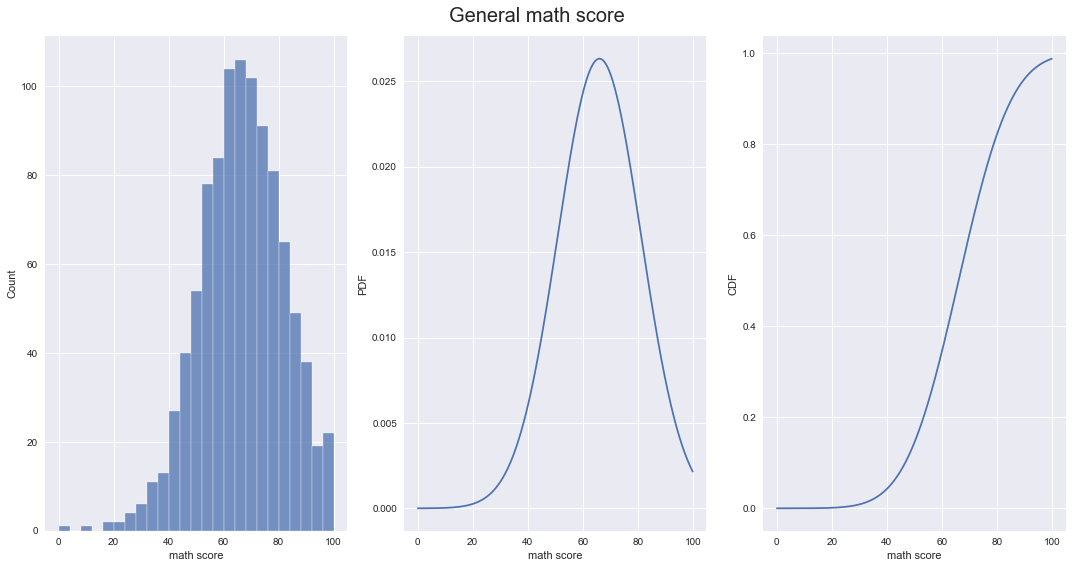

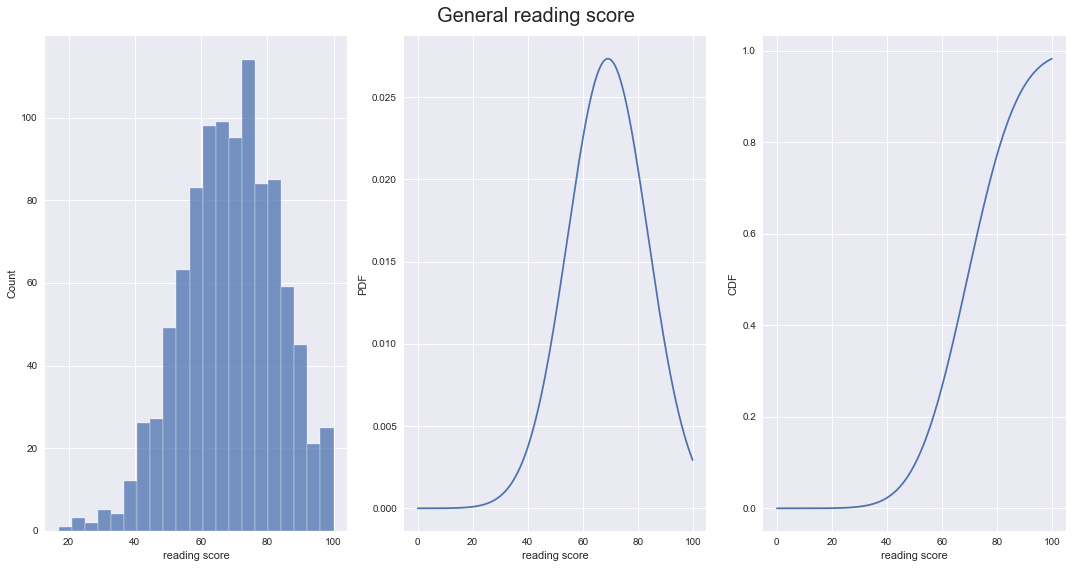

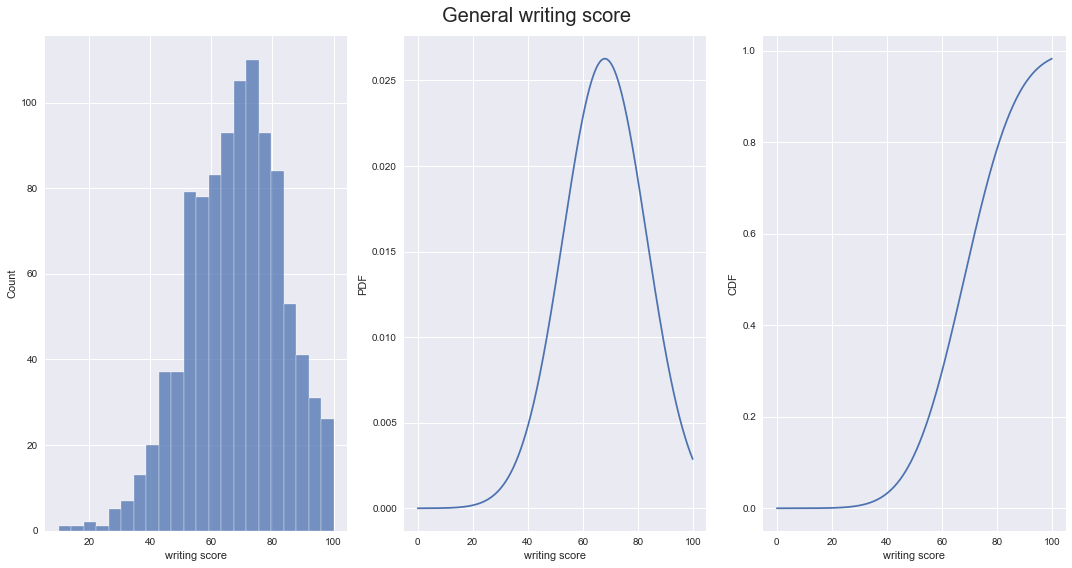

In [7]:
## Array with sample numbers between 0 and 100 (min and max possible scores)
x = np.linspace(start = 0,stop = 100,num = 1000)
## For loop for each score
for c in columns:
    ## Get mean and standard deviation of column
    loc,scale = stats.norm.fit(df[c])
    ### Probability of score in sample array being x
    pdf = stats.norm.pdf(x, loc = loc,scale = scale)
    ### Probability of score in sample array being below x
    cdf = stats.norm.cdf(x, loc = loc,scale = scale)
    fig,axs = plt.subplots(ncols = 3, figsize=(15, 8))
    fig.suptitle('General ' + c, fontsize=20)
    ## Distribution of scores
    sns.histplot(data = df, x = c,ax = axs[0])
    ### Plot PDF for each sample score (should match boxplot previously plotted)
    sns.lineplot(x = x,y = pdf,ax = axs[1]).set( xlabel = c, ylabel = "PDF")
    ### Plot CDF for each sample score
    sns.lineplot(x = x,y = cdf,ax = axs[2]).set( xlabel = c, ylabel = "CDF")
    fig.tight_layout()

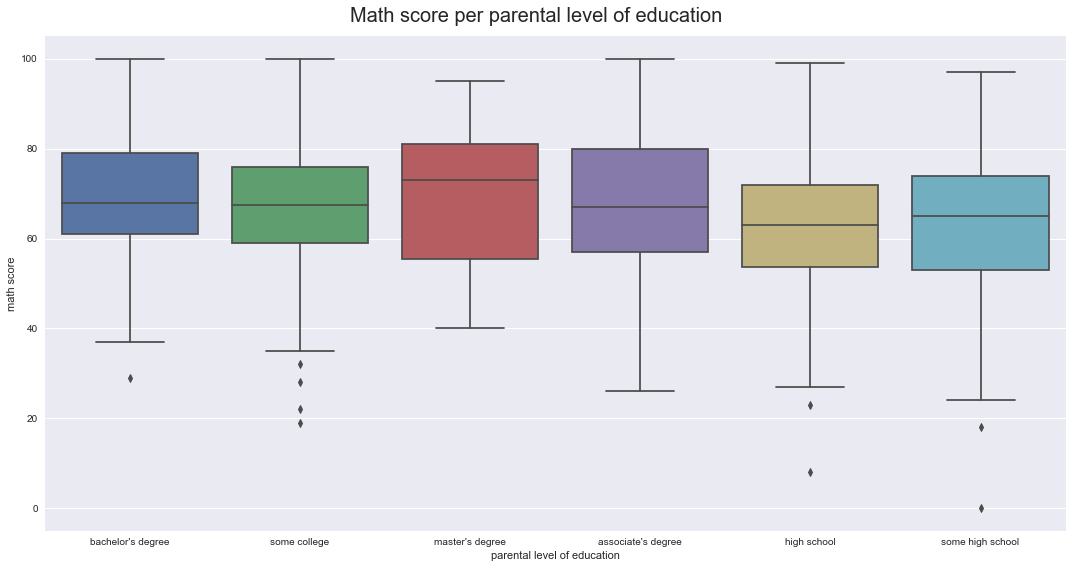

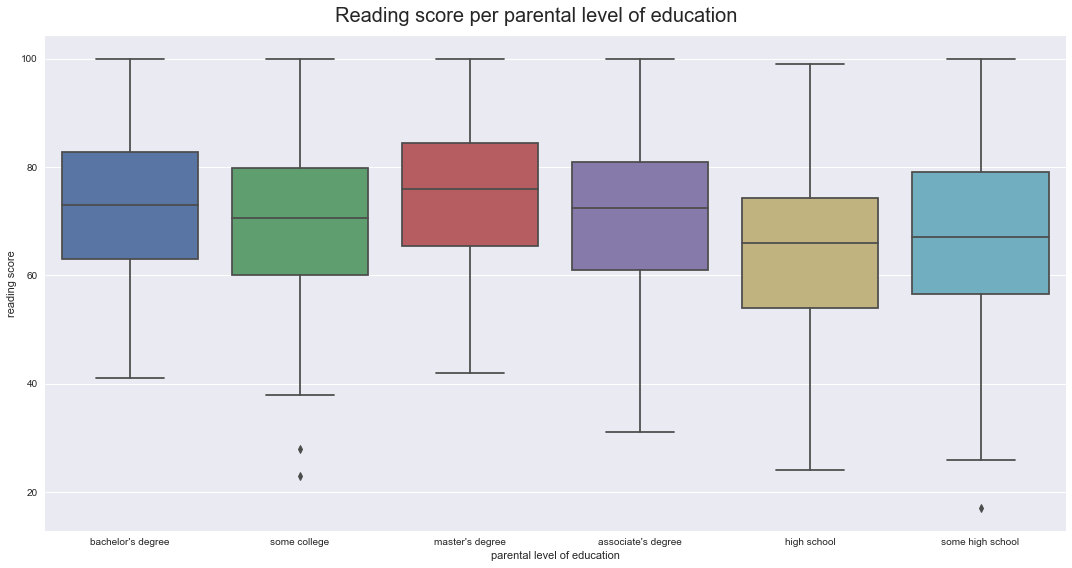

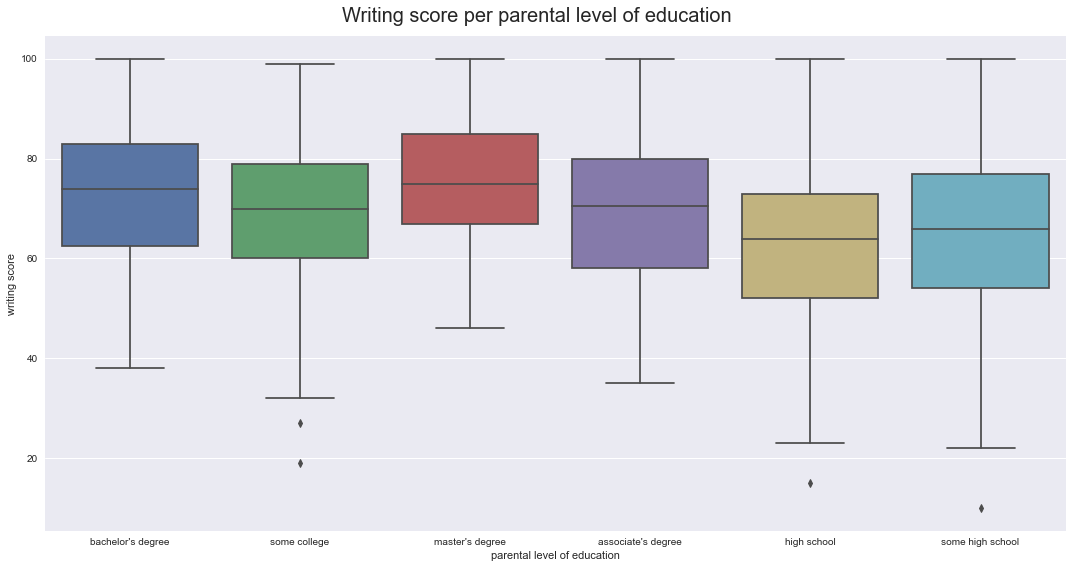

In [8]:
## For loop of each column
for c in columns:
    fig,axs = plt.subplots(nrows = 1, figsize=(15, 8))
    fig.suptitle(c.capitalize() + ' per parental level of education', fontsize=20)
    ## Plot column scores for each parental level of education
    sns.boxplot(data = df,x = 'parental level of education', y = c)
    fig.tight_layout()

In [9]:
## Get the value counts of each gender and convert to dataframe
genders = df['gender'].value_counts().to_frame().reset_index().rename(columns = {'gender':'count'})

In [10]:
## Function to convert percentage to number
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

In [11]:
## Group by gender and get race/ethnicity value counts for each one
groups_rne = df.groupby('gender')['race/ethnicity'].value_counts().to_frame().rename(columns = {df.columns[1]:'count'}).reset_index()

Text(0.5, 1.0, 'Distribution of gender per each race/ethnicity group')

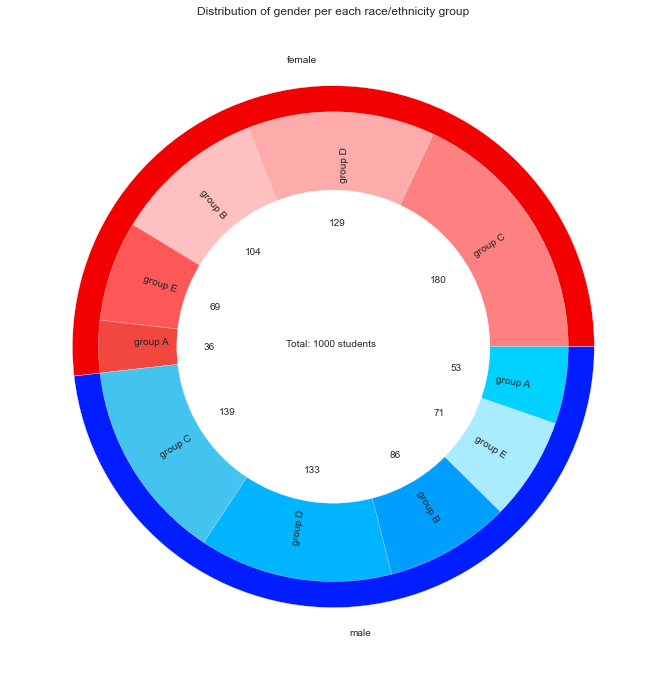

In [12]:
c1 = ['#f30000','#001eff']
c2 = ['#fe8181','#feabab','#fec0c0','#fe5757','#f2473f','#43c4ef','#00b4ff','#009eff','#a9ecff','#00d2ff']
fig,ax = plt.subplots(figsize=(24,12))
## Plot first pie with genders
p1 = ax.pie(genders['count'],radius = 1,labels = genders['index'],wedgeprops=dict(edgecolor='w'),colors = c1)
## Plot second pie with race/ethnicity count
p2 = ax.pie(groups_rne['count'],radius = 0.9,labels = groups_rne['race/ethnicity'],autopct= autopct_format(groups_rne['count']),labeldistance=0.7,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True,colors =c2)
## Plot circle to make the plot a donut
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total: ' + str(int(sum(groups_rne['count']))) + ' students',xy =(-0.18, 0))
plt.title('Distribution of gender per each race/ethnicity group')

In [13]:
## Group by gender and get the value counts for test preparation course in each gender
groups_prep = df.groupby('gender')['test preparation course'].value_counts().to_frame().rename(columns = {'test preparation course':'count'}).reset_index()

Text(0.5, 1.0, 'Distribution of gender by completion of preparation test course')

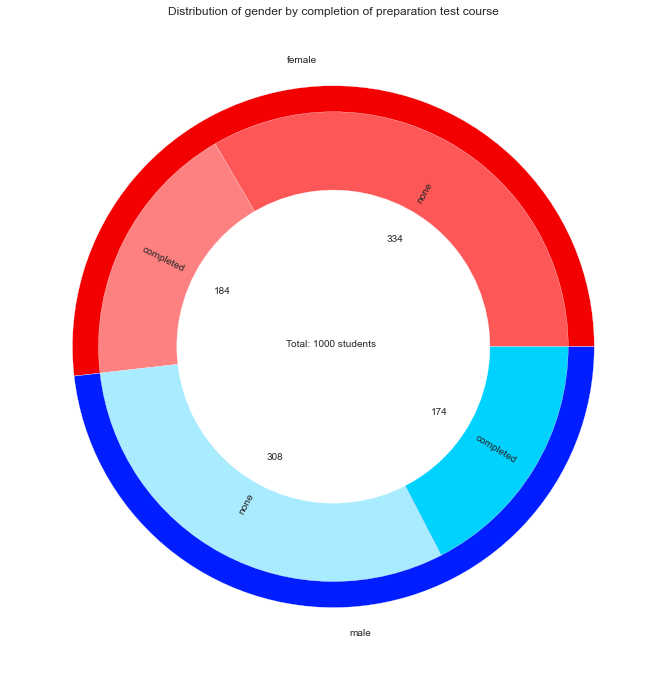

In [14]:
c1 = ['#f30000','#001eff']
c2 = ['#fe5757','#fe8181','#a9ecff','#00d2ff']
fig,ax = plt.subplots(figsize=(24,12))
## Plot first pie with genders
p1 = ax.pie(genders['count'],radius = 1,labels = genders['index'],wedgeprops=dict(edgecolor='w'),colors = c1)
## Plot second pie with test preparation counts
p2 = ax.pie(groups_prep['count'],radius = 0.9,labels = groups_prep['test preparation course'],autopct= autopct_format(groups_prep['count']),labeldistance=0.7,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True,colors =c2)
## Plot circle to make the plot a donut
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total: ' + str(int(sum(groups_prep['count']))) + ' students',xy =(-0.18, 0))
plt.title('Distribution of gender by completion of preparation test course')

In [15]:
## Group by gender and get parental level of education value counts
groups_parents = df.groupby('gender')['parental level of education'].value_counts().to_frame().rename(columns = {'parental level of education':'count'}).reset_index()

Text(0.5, 1.0, 'Distribution of gender per preparation test course')

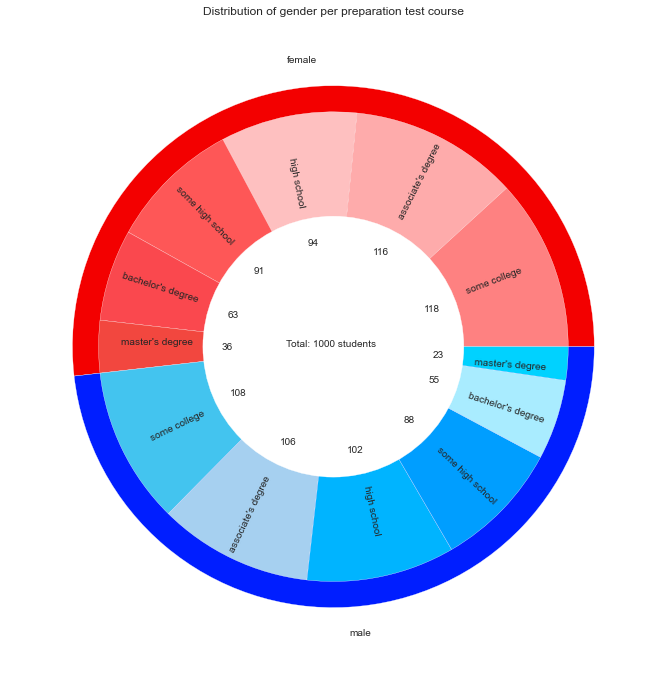

In [16]:
c1 = ['#f30000','#001eff']
c2 = ['#fe8181','#feabab','#fec0c0','#fe5757','#fa484e','#f2473f','#43c4ef','#a6d0f0','#00b4ff','#009eff','#a9ecff','#00d2ff']
fig,ax = plt.subplots(figsize=(24,12))
## Plot first pie with genders
p1 = ax.pie(genders['count'],radius = 1,labels = genders['index'],wedgeprops=dict(edgecolor='w'),colors = c1)
## Plot second pie with parental level of education value counts
p2 = ax.pie(groups_parents['count'],radius = 0.9,labels = groups_parents['parental level of education'],autopct= autopct_format(groups_parents['count']),labeldistance=0.6,wedgeprops=dict(edgecolor='w'), pctdistance=0.45,rotatelabels =True,colors =c2)
## Plot circle to make the plot a donut
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total: ' + str(int(sum(groups_parents['count']))) + ' students',xy =(-0.18, 0))
plt.title('Distribution of gender per preparation test course')

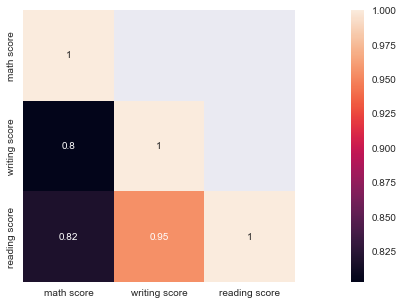

In [17]:
## Select only score columns
df1 = df[['math score','writing score','reading score']]
df_cat = pd.get_dummies(df1)
## Get correlation matrix
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(20,5)
## Plot heatmap with correlation coefficients
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True);
## If there is postive correlation between the score in each subject, the coefficient should approach 1, if 
## there is negative correlation, the coefficient should approach -1, and if there is no correlation, the 
## coefficient should approach 0

In [18]:
###  H0 = race/ethnicity and parental level of education are dependent (p-value > 0.05) 
###  H1 = race/ethnicity and parental level of education are independent (p-value < 0.05)

## Perform chi squared test between race/ethnicity and parental level of education
expected, observed, statistics = pingouin.chi2_independence(data = df,x = 'parental level of education',y = 'race/ethnicity')
print('Expected:')
print(expected)
print('Observed:')
print(observed)
print('Stats:')
print(statistics)
### p-value higher than 0.05 so race/ethnicity and parental level of education are dependent

Expected:
race/ethnicity               group A  group B  group C  group D  group E
parental level of education                                             
associate's degree            19.758    42.18   70.818   58.164    31.08
bachelor's degree             10.502    22.42   37.642   30.916    16.52
high school                   17.444    37.24   62.524   51.352    27.44
master's degree                5.251    11.21   18.821   15.458     8.26
some college                  20.114    42.94   72.094   59.212    31.64
some high school              15.931    34.01   57.101   46.898    25.06
Observed:
race/ethnicity               group A  group B  group C  group D  group E
parental level of education                                             
associate's degree                14       41       78       50       39
bachelor's degree                 12       20       40       28       18
high school                       18       48       64       44       22
master's degree                

C:\Users\loren\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [19]:
## Group by gender and get lunch value counts
groups_lunch = df.groupby('gender')['lunch'].value_counts().to_frame().rename(columns = {'lunch':'count'}).reset_index()

Text(0.5, 1.0, 'Distribution of gender per lunch status')

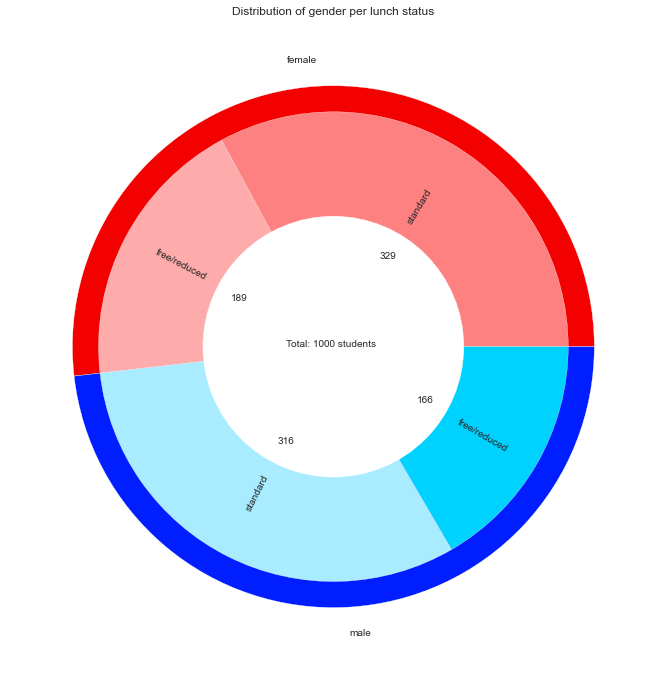

In [20]:
c1 = ['#f30000','#001eff']
c2 = ['#fe8181','#feabab','#a9ecff','#00d2ff']
fig,ax = plt.subplots(figsize=(24,12))
## Plot first pie with genders
p1 = ax.pie(genders['count'],radius = 1,labels = genders['index'],wedgeprops=dict(edgecolor='w'),colors = c1)
## Plot second pie with lunch value counts
p2 = ax.pie(groups_lunch['count'],radius = 0.9,labels = groups_lunch['lunch'],autopct= autopct_format(groups_parents['count']),labeldistance=0.6,wedgeprops=dict(edgecolor='w'), pctdistance=0.45,rotatelabels =True,colors =c2)
## Plot circle to make the plot a donut
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total: ' + str(int(sum(groups_lunch['count']))) + ' students',xy =(-0.18, 0))
plt.title('Distribution of gender per lunch status')